In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
np.random.seed(42)

import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [2]:
#Converting dataset into DataFrame
carsData = pd.read_csv("carsData/cardekho.csv")

In [3]:
#Analysing the Data
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [4]:
carsData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
carsData.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [6]:
#Extracting Brandname instead of exact car model for reducing the no. of columns
def BrandName(s):
    return s.split()[0] if isinstance(s, str) else s
carsData["name"] = carsData["name"].apply(BrandName)
carsData.head()
carsData["name"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [7]:
#Dropping null values and reseting the indexes
carsData.dropna(inplace=True)
carsData.reset_index(drop=True, inplace=True)
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7907 non-null   object 
 1   year                7907 non-null   int64  
 2   selling_price       7907 non-null   int64  
 3   km_driven           7907 non-null   int64  
 4   fuel                7907 non-null   object 
 5   seller_type         7907 non-null   object 
 6   transmission        7907 non-null   object 
 7   owner               7907 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7907 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 741.4+ KB


In [8]:
#Converting max_power into a float type as it was string type
for col in carsData.select_dtypes(include=['object']).columns:
    carsData[col] = carsData[col].replace(' ', "0.0")
carsData["max_power"] = carsData["max_power"].astype(float)
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7907 non-null   object 
 1   year                7907 non-null   int64  
 2   selling_price       7907 non-null   int64  
 3   km_driven           7907 non-null   int64  
 4   fuel                7907 non-null   object 
 5   seller_type         7907 non-null   object 
 6   transmission        7907 non-null   object 
 7   owner               7907 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7907 non-null   float64
 11  seats               7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 741.4+ KB


In [9]:
#Converting categorical attributes to numerical attributes for making it algorithm compatible
catAttributes = ["name", "fuel", "seller_type", "transmission","owner"] 
carsDataEncoded = pd.get_dummies(carsData,columns = catAttributes)
carsDataEncoded.head()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,name_Ambassador,name_Ashok,name_Audi,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248.0,74.00,5.0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,2006,158000,140000,17.70,1497.0,78.00,5.0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,2010,225000,127000,23.00,1396.0,90.00,5.0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2007,130000,120000,16.10,1298.0,88.20,5.0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [10]:
#Calculating Correlation matrix and viewing correlation for label("selling_price") for Data Insights
carsDataEncoded.corr()["selling_price"].sort_values(ascending = False)[1:10]

max_power                 0.749566
transmission_Automatic    0.590279
name_BMW                  0.530167
engine                    0.455734
year                      0.412268
seller_type_Dealer        0.401822
name_Lexus                0.363535
name_Volvo                0.297987
name_Jaguar               0.265111
Name: selling_price, dtype: float64

In [11]:
#Spliting the training and testing data
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(carsDataEncoded, test_size = 0.2, random_state = 42)

trainingData = trainData.drop("selling_price", axis = 1)
trainingLabels = trainData["selling_price"].copy()
testingData = testData.drop("selling_price", axis = 1)
testingLabels = testData["selling_price"].copy()

In [12]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(trainingData,trainingLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
from sklearn.metrics import mean_squared_error
linearTestPreds = linearModel.predict(testingData)
linearMSE = mean_squared_error(linearTestPreds, testingLabels)
print(np.sqrt(linearMSE))

292495.5373488878


In [14]:
#Linear Regression model with regularization(Lasso Regression)
from sklearn.linear_model import Lasso
lassoModel = Lasso(alpha = 1, max_iter = 1000, random_state = 42)
lassoModel.fit(trainingData,trainingLabels)

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56032154165659.375, tolerance: 404996889271.584
  positive)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=42, selection='cyclic',
      tol=0.0001, warm_start=False)

In [15]:
lassoTestPreds = lassoModel.predict(testingData)
lassoMSE = mean_squared_error(lassoTestPreds, testingLabels)
print(np.sqrt(lassoMSE))

292233.13951771904


In [16]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
treeModel = DecisionTreeRegressor(max_depth = 12, random_state = 42)
treeModel.fit(trainingData,trainingLabels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [17]:
treeTestPreds = treeModel.predict(testingData)
treeMSE = mean_squared_error(treeTestPreds, testingLabels)
print(np.sqrt(treeMSE))

136703.434401964


In [18]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
forestModel = RandomForestRegressor(n_estimators = 175, max_depth = 15, random_state = 42)
forestModel.fit(trainingData,trainingLabels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=175, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [19]:
forestTestPreds = forestModel.predict(testingData)
forestMSE = mean_squared_error(forestTestPreds, testingLabels)
print(np.sqrt(forestMSE))

115315.35983259075


In [20]:
#Getting the best parameters for Random Forest Model through CrossValidation
bestForestModel = RandomForestRegressor(random_state = 42)
forestGrid = [
    {"n_estimators" : [150,175,200], "max_depth" : [15,20,25]},
]
from sklearn.model_selection import GridSearchCV
crossVal = GridSearchCV(bestForestModel, forestGrid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)
crossVal.fit(trainingData, trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [21]:
finalForestModel = crossVal.best_estimator_
finalForestModel.fit(trainingData, trainingLabels)
finalForestPreds = finalForestModel.predict(testingData)
finalForestMSE = mean_squared_error(testingLabels, finalForestPreds)
print(np.sqrt(finalForestMSE))
print(crossVal.best_params_)

114271.32356640314
{'max_depth': 20, 'n_estimators': 150}


In [22]:
#Gradiant Boost Model
from sklearn.ensemble import GradientBoostingRegressor
gbrModel = GradientBoostingRegressor(n_estimators = 150, learning_rate = 1, random_state = 42)
gbrModel.fit(trainingData,trainingLabels)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
gbrTestPreds = gbrModel.predict(testingData)
gbrMSE = mean_squared_error(gbrTestPreds, testingLabels)
print(np.sqrt(gbrMSE))

131199.34349021292


In [24]:
#Getting the best parameters for Gradiant Boost Model through CrossValidation
bestgbrModel = GradientBoostingRegressor(random_state = 42, learning_rate = 0.9)
gbrGrid = [
    {"n_estimators" : [150,200,250]},
]
from sklearn.model_selection import GridSearchCV
crossVal = GridSearchCV(bestgbrModel, gbrGrid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)
crossVal.fit(trainingData, trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.9,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [25]:
finalgbrModel = crossVal.best_estimator_
finalgbrModel.fit(trainingData, trainingLabels)
finalgbrPreds = finalgbrModel.predict(testingData)
finalgbrMSE = mean_squared_error(testingLabels, finalgbrPreds)
print(np.sqrt(finalgbrMSE))
print(crossVal.best_params_)

129550.57385298892
{'n_estimators': 200}


In [26]:
#Ensembling Random Forest and Gradiant Boost Model with best parameters
from sklearn.ensemble import VotingRegressor
forest_model = RandomForestRegressor(max_depth = 20, n_estimators = 150, random_state = 42)
gbr_model = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.9, random_state = 42)
votingModel = VotingRegressor([("forest_model", forest_model),("gbr_model", gbr_model)])
votingModel.fit(trainingData,trainingLabels)

VotingRegressor(estimators=[('forest_model',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=20,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=150,
                             

In [27]:
votingTestPreds = votingModel.predict(testingData)
votingMSE = mean_squared_error(votingTestPreds, testingLabels)
print(np.sqrt(votingMSE))

106691.05468646041


In [28]:
#NeuralNetwork
model = keras.models.Sequential([
    keras.layers.Dense(128, input_dim = len(trainingData.columns), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation ='relu'),
])

In [29]:
def root_mean_squared_error(y_true, y_pred):
    return tf.math.sqrt(tf.math.reduce_mean(tf.math.square(y_pred - y_true)))

trainingLabelsF = trainingLabels.astype(float)
testingLabelsF = testingLabels.astype(float)

model.compile(optimizer = keras.optimizers.Adam(), loss = root_mean_squared_error)
history = model.fit(trainingData, trainingLabelsF, epochs = 100, validation_data = (testingData, testingLabelsF))

Epoch 1/100
198/198 [==============================] - 1s 3ms/step - loss: 878444.2500 - val_loss: 887047.9375
Epoch 2/100
198/198 [==============================] - 0s 2ms/step - loss: 647510.2500 - val_loss: 665672.0000
Epoch 3/100
198/198 [==============================] - 0s 2ms/step - loss: 573120.6875 - val_loss: 632064.7500
Epoch 4/100
198/198 [==============================] - 0s 2ms/step - loss: 563862.3125 - val_loss: 610190.6250
Epoch 5/100
198/198 [==============================] - 0s 2ms/step - loss: 543001.8125 - val_loss: 595974.4375
Epoch 6/100
198/198 [==============================] - 0s 2ms/step - loss: 522590.2500 - val_loss: 569719.4375
Epoch 7/100
198/198 [==============================] - 0s 2ms/step - loss: 506413.6250 - val_loss: 551982.0000
Epoch 8/100
198/198 [==============================] - 0s 2ms/step - loss: 491736.7500 - val_loss: 545931.9375
Epoch 9/100
198/198 [==============================] - 0s 2ms/step - loss: 481458.6875 - val_loss: 556991.9375
E

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainingDataScaled = scaler.fit_transform(trainingData)
testingDataScaled = scaler.fit_transform(testingData)

In [31]:
#NeuralNetwork for scaledData
modelScaled = keras.models.Sequential([
    keras.layers.Dense(128, input_dim = len(trainingData.columns), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation ='relu'),
])

In [32]:
modelScaled.compile(optimizer = keras.optimizers.Adam(), loss = root_mean_squared_error)
history = modelScaled.fit(trainingDataScaled, trainingLabelsF, epochs = 100, validation_data = (testingDataScaled, testingLabelsF))

Epoch 1/100
198/198 [==============================] - 1s 3ms/step - loss: 961215.3750 - val_loss: 934192.8750
Epoch 2/100
198/198 [==============================] - 0s 2ms/step - loss: 567437.8125 - val_loss: 444146.6875
Epoch 3/100
198/198 [==============================] - 0s 2ms/step - loss: 365805.6250 - val_loss: 357838.4688
Epoch 4/100
198/198 [==============================] - 0s 2ms/step - loss: 312514.1562 - val_loss: 311179.9062
Epoch 5/100
198/198 [==============================] - 0s 2ms/step - loss: 280988.4688 - val_loss: 277411.9375
Epoch 6/100
198/198 [==============================] - 0s 2ms/step - loss: 255184.9688 - val_loss: 252823.0781
Epoch 7/100
198/198 [==============================] - 0s 2ms/step - loss: 242338.0938 - val_loss: 243410.6719
Epoch 8/100
198/198 [==============================] - 0s 2ms/step - loss: 235082.8125 - val_loss: 245011.9844
Epoch 9/100
198/198 [==============================] - 0s 2ms/step - loss: 231848.3750 - val_loss: 232422.3750
E

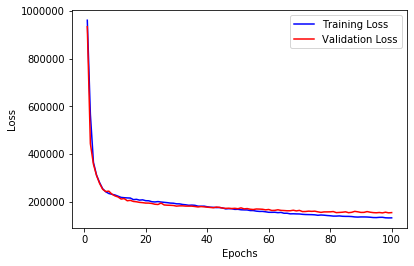

In [33]:
loss = history.history["loss"]
valLoss = history.history["val_loss"]
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, "b")
plt.plot(epochs, valLoss, "r")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss","Validation Loss"])
plt.show()